<a href="https://colab.research.google.com/github/Ananya-AJ/Deep-Learning/blob/main/DeepLearning_state_of_art_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#cnn_learner for classification, unet_learner for segmentation, text_classifier_learner for sentiment analysis, tabular_learner for decisiontree, collab_learner for ranking demo



In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 5.8 MB/s eta 0:00:00
Mounted at /content/gdrive


In [3]:
from fastbook import *

In [ ]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# !kaggle datasets download -d gpiosenka/100-bird-species

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
from fastai.vision.all import *

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os

##cnn_learner for image classification using bird dataset

In [ ]:
import pathlib

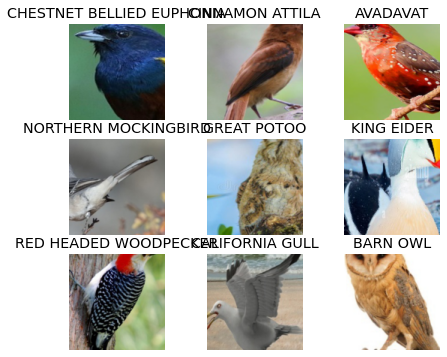

In [ ]:
# dls.show_batch(figsize=(7,6))

In [ ]:
# learn = cnn_learner(dls, models.resnet50, metrics=[accuracy], model_dir = Path('/content'),path = Path("."))

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pt

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

##cnn-learner image classification using dataset from duck duck go

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
cat_types = 'Asian', 'Australian Mist','Bengal','British Longhair','Cyprus', 'Bombay', 'Japanese Bobtail','Russian Blue','Selkirk Rex',  'Turkish Vankedisi'
path = Path('cats2')
if not path.exists():
  path.mkdir()
  for o in cat_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} cat')
    download_images(dest, urls=urls)

In [ ]:
fns = get_image_files(path)
fns

(#1902) [Path('cats2/Australian Mist/0bc26cf5-5fbe-47c8-9e6e-21fe9530d4f6.jpg'),Path('cats2/Australian Mist/bc5ae54d-4218-480c-9b71-077cc4936c67.jpg'),Path('cats2/Australian Mist/9d8a89a3-c9f4-4498-87cd-2d937e947348.jpg'),Path('cats2/Australian Mist/18bc7c6b-01ae-464a-bf37-9651dced64a4.jpg'),Path('cats2/Australian Mist/2a2f4be6-4e30-4a9c-b8ce-dc61e191cb85.jpg'),Path('cats2/Australian Mist/bb47113f-217d-43a1-9d61-18cfc84fc03c.jpg'),Path('cats2/Australian Mist/e1ff6e13-9fda-4955-b888-bc922bba5cb8.jpg'),Path('cats2/Australian Mist/94876a6b-b134-4c03-9e95-b66713461cfc.jpg'),Path('cats2/Australian Mist/8f6eda75-2aa7-410e-81db-ef0300a1a73f.jpg'),Path('cats2/Australian Mist/4ce22bbd-128c-455a-9d07-20aac4dbbc2b.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#61) [Path('cats2/Bombay/3e2aff87-f7f5-4529-ab04-2a39bd8d4fc4.jpg'),Path('cats2/Bombay/dcd32530-7a37-424e-a315-79992da27f32.jpg'),Path('cats2/Bombay/12dd798d-fb1b-486a-98e1-3be05baff768.jpg'),Path('cats2/Bombay/ee59870b-dea7-419f-9d07-b021b77653ea.jpg'),Path('cats2/Bombay/19046a83-3558-4ac8-bdfa-00877bbe95d0.jpg'),Path('cats2/Bombay/5c19a122-f4fc-4cbc-9777-5c9b59211180.jpg'),Path('cats2/Bombay/b068290a-fd2f-4566-a25d-9ce77ef687c0.jpg'),Path('cats2/Turkish Vankedisi/5484632e-f53b-4f71-9178-21f2e383097d.jpg'),Path('cats2/Turkish Vankedisi/db1d063d-6e4d-43af-af07-979a7a7de56c.jpg'),Path('cats2/Turkish Vankedisi/83d673c9-d7fd-4ce6-a035-2e10ce2b7e37.jpg')...]

In [ ]:
failed.map(Path.unlink);

In [ ]:
cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label
)

In [ ]:
cats = cats.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = cats.dataloaders(path)

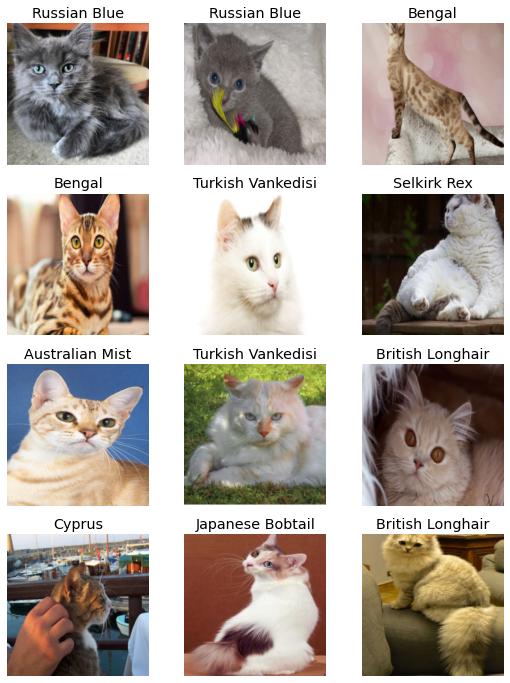

In [ ]:
dls.valid.show_batch(max_n=12, nrows=4) 

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
# learn.fine_tune(epochs=10)

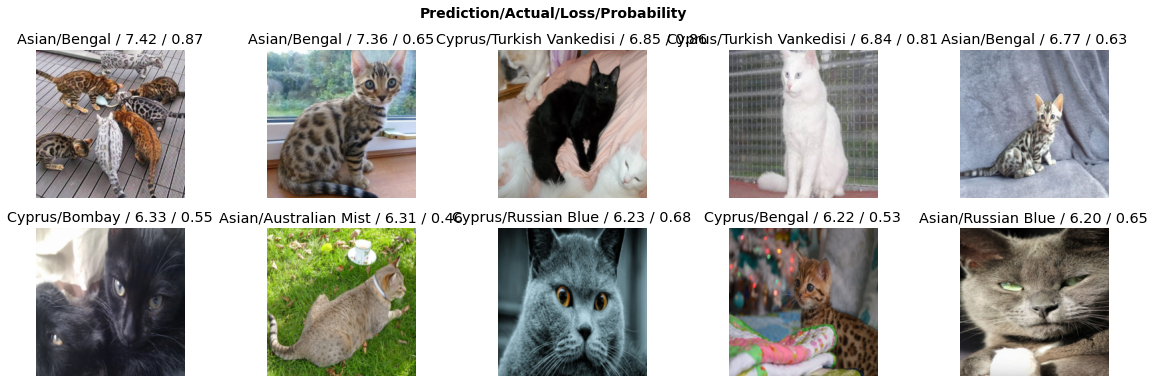

In [ ]:
from IPython.core.pylabtools import figsize 
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(10, nrows=2, figsize=(20,6))

##Unet_learner for image segmentation pulling dataset from CAMVID_TINY API

In [10]:
dataset_path = untar_data(URLs.CAMVID_TINY)
dataset_path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images')]

In [11]:
segmented_data = SegmentationDataLoaders.from_label_func(dataset_path, bs=8, fnames = get_image_files(dataset_path/'images'), 
                                                            label_func = lambda o: dataset_path/'labels'/f'{o.stem}_P{o.suffix}', codes = np.loadtxt(dataset_path/'codes.txt', dtype=str))

In [12]:
#Using unet_learner
model = unet_learner(segmented_data, resnet34)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

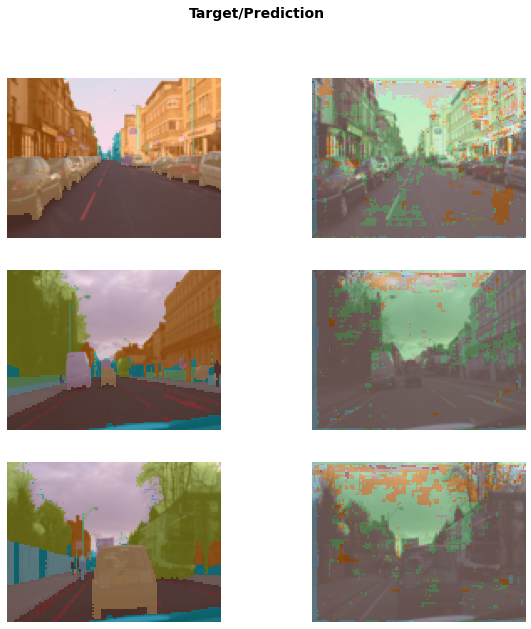

In [13]:
#Show predictions
model.show_results(max_n=3, figsize=(10,10))

In [14]:
#fine tuning
model.fine_tune(10)

epoch,train_loss,valid_loss,time
0,3.023471,2.401760,00:02


epoch,train_loss,valid_loss,time
0,1.862931,1.663077,00:02
1,1.577329,1.352505,00:02
2,1.446661,1.523766,00:01
3,1.323575,1.020245,00:02
4,1.226905,1.148255,00:02
5,1.133178,0.928376,00:02
6,1.042179,0.917942,00:02
7,0.955235,0.856409,00:02
8,0.881841,0.826095,00:02
9,0.821056,0.829031,00:02


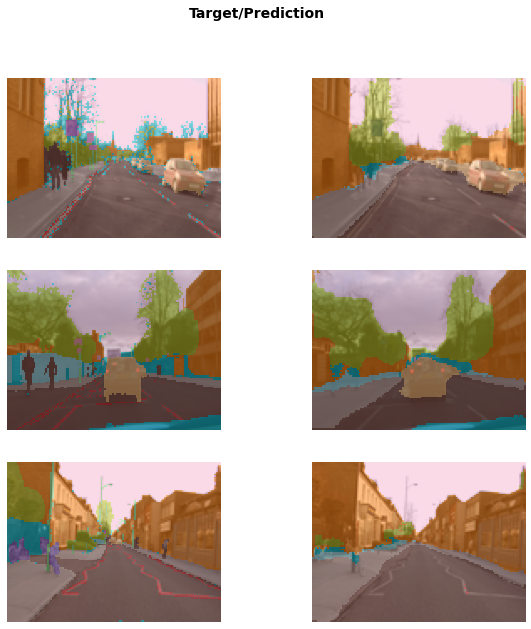

In [15]:
#results post fine tuning 
model.show_results(max_n=3, figsize=(10,10))

##text_classifier_learner for sentiment analysis- using imdb dataset

In [4]:
from fastai.text.all import *

In [6]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [7]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [9]:
# learn.fine_tune(4, 1e-2)

In [8]:
learn.predict("I dont like that movie!")

('neg', tensor(0), tensor([0.5024, 0.4976]))

##Tabular data using tabular_learner - dataset - Adult_sample

In [ ]:
from fastai.tabular.all import *

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/adult_sample/export.pkl'),Path('/root/.fastai/data/adult_sample/models'),Path('/root/.fastai/data/adult_sample/adult.csv')]

In [ ]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [ ]:
tabular_data = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary', cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'], procs = [Categorify, FillMissing, Normalize])


In [ ]:
learn = tabular_learner(tabular_data, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.373570,0.360399,0.832770,00:05


In [ ]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,3.0,8.0,5.0,2.0,4.0,1.0,1.0,-0.556439,-0.359698,0.757469,0.0,0.0
1,5.0,13.0,4.0,2.0,5.0,5.0,1.0,0.764589,-0.102966,1.542544,0.0,0.0
2,5.0,12.0,3.0,4.0,1.0,5.0,1.0,-1.070172,2.534546,-0.420144,0.0,0.0
3,3.0,10.0,1.0,11.0,2.0,5.0,1.0,1.058150,-0.813166,1.150006,0.0,0.0
4,5.0,12.0,5.0,11.0,2.0,5.0,1.0,-0.336268,-0.286392,-0.420144,0.0,0.0
5,5.0,10.0,5.0,13.0,2.0,3.0,1.0,-0.556439,0.398851,1.150006,0.0,0.0
6,5.0,16.0,5.0,9.0,4.0,5.0,1.0,-0.189487,-1.484282,-0.027607,0.0,0.0
7,5.0,10.0,3.0,15.0,1.0,5.0,1.0,-0.262877,1.511560,1.150006,0.0,1.0
8,5.0,10.0,3.0,11.0,1.0,5.0,1.0,0.177465,-0.354320,1.150006,1.0,1.0


##Using colab_learner to rank/recommend movies- movielens dataset

In [ ]:
from fastai.tabular.all import *
from fastai.collab import *

In [ ]:
path = untar_data(URLs.ML_100k)

In [ ]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      usecols=(0,1,2), names=['user','movie','rating'])
ratings.head()

,user,movie,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [ ]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [ ]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)

In [ ]:
dls.show_batch()

,user,title,rating
0,890,Young Frankenstein (1974),5
1,55,Braveheart (1995),5
2,426,Schindler's List (1993),5
3,308,Willy Wonka and the Chocolate Factory (1971),4
4,393,Miracle on 34th Street (1994),4
5,699,Homeward Bound II: Lost in San Francisco (1996),4
6,280,Love Affair (1994),4
7,537,Meet John Doe (1941),3
8,670,"39 Steps, The (1935)",3
9,63,Kids in the Hall: Brain Candy (1996),2


In [ ]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

In [ ]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.948521,0.934293,00:12
1,0.868526,0.867922,00:10
2,0.731077,0.824975,00:19
3,0.592621,0.813603,00:10
4,0.490825,0.814138,00:11


In [ ]:
learn.show_results()

,user,title,rating,rating_pred
0,87,1200,5,4.144777
1,634,208,4,3.790340
2,889,224,4,2.987026
3,405,36,1,2.159831
4,537,416,2,2.191532
5,2,456,5,3.830181
6,907,1275,5,4.213214
7,921,537,3,3.188937
8,392,1598,4,4.898770
